
# Investigating [tmdb movies] Dataset .

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

## Dataset Description 
the dataset contains data for more than 10 thousands movies from the 60th until 2015, the data it contains :
- **id** 
- **imdb_id**
- **popularity**
- **budget** :important for finding relations between budget and other attributes 
- **revenue** :important for finding relations between revenue and other attributes and what makes a move gain more revenue than other movies
- **original_title** name of the movie
- **cast** the casting crew of the movie
- **homepage** link to the webpage of the movie
- **director** director of the movie
- **tagline** 
- **overview** the synopsis of the film
- **runtime** movie length in minutes,important to find relations between it and other attributes 
- **genres** genres of a movie
- **production_companies** 
- **release_date**
- **vote_count**
- **vote_average** average rating by audience
- **release_year**
- **budget_adj** budget of the movie in terms of 2010 dollars
- **revenue_adj** revenue of the movie in terms of 2010 dollars

thats already great and enough for exploration and finding most important trends and relations and answering qustions.
**note** that revenue and budget columns have many 0 values.

## Questions for Analysis:

###  Genres' Statistics :
##### 1 which genres had highest overall average popularity?
##### 2 and  what's year over year popularity for those 6 genres?
##### 3 what is the average revenue a movie makes in each genre?
##### 4 what is the Total revenue achieved in each genre?

###  5 what properties are associated with revenue ? 
#####  in terms of budget.
#####  in terms of Runtime.
#####  in terms of popularity.
#####  in terms of average ratings.

### 6 (reserch question) properties associated with Top 10 revenue movies:
#####    compared to mean budget , runtime ,ratings and popularity of high rev movies 

###  Highest percentages stats :
##### 7 Directors: which directors realesed most movies(top10) ?
##### 8 Actors: Which Actors has more movies (top 10)?
##### 9 Movies: which movie made highest revenue ?
##### 10 which movies made highest profits (top10)?
##### 11 Production Company: which production company has higher movie realeses?
##### 12 which companies has highest total revenue?



In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast
sns.set_theme()

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# i was already using pandas 1.4

#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling




### General Properties:

In [2]:
# loading the dataframe
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# inspecting datatypes and null-values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# inspecting brief statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


A lot of movies with budget and revenue has no Given value

In [5]:
print("Films that has Zero value in budget: ",df.query('budget == 0').shape[0])

Films that has Zero value in budget:  5696


In [6]:
print("Films that has Zero value in revenue: ",df.query('revenue == 0').shape[0])

Films that has Zero value in revenue:  6016


this dataset has a weakness in this side , so stats calculated using revenue , and budget column will be on alimited sample size

In [7]:
# checking for any duplicates
df.duplicated().sum()

1

-----------------


### Data Cleaning

dropping columns that are less important in answering the qustions.

In [8]:
# dropping columns that won't be used:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview','budget_adj','revenue_adj'], axis=1, inplace=True)
# check for changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


dropping duplicate rows

In [9]:
# checking for any duplicates
print("number of duplicates",df.duplicated().sum())

number of duplicates 1


In [10]:
# dropping duplicate rows 
df.drop_duplicates(inplace=True)

### dropping null values from columns:

**Note** i will be dropping nan value only from columns: director , genres and cast for now. and will drop nan from production companies later
,because nearly 1000 rows in production companies are missing. so i will drop them in another data frame later when exploring production companies statistics. 

In [11]:
#dropping nan rows of director column
df.dropna(subset=['director','genres','cast'], inplace=True)
#check for changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10731 non-null  float64
 1   budget                10731 non-null  int64  
 2   revenue               10731 non-null  int64  
 3   original_title        10731 non-null  object 
 4   cast                  10731 non-null  object 
 5   director              10731 non-null  object 
 6   runtime               10731 non-null  int64  
 7   genres                10731 non-null  object 
 8   production_companies  9772 non-null   object 
 9   release_date          10731 non-null  object 
 10  vote_count            10731 non-null  int64  
 11  vote_average          10731 non-null  float64
 12  release_year          10731 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


### Making & replacing columns:
- profit column.
- genre_list column: it has genres of a movie in a list type
- cast_list column: it has a list of actors for each movie in list datatype
- company_list column: it has production companies for a movie in a list type

**note** I will make the(genre_list,cast_list,company_list) in a list datatype to be able to explode when needed for the analysis

making a new column for profit

In [12]:
df['profit'] = df['revenue'] - df['budget']
#check for changes
df.head(0)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit


making a new column that contains a list type of genres for each film to be able to use **explode()** function on it later

In [13]:
#changing genres string format to be list like
df.genres = df.genres.apply(lambda x : x.replace("|", "', '"))
df.genres = df.genres.apply(lambda x : "['{}']".format(x.lower()))

In [14]:
# making a new column "genre_list" which contains a list of genres for each film 
df['genre_list'] = df.genres.apply(lambda x: list(ast.literal_eval(x)))

# then dropping "genres" column 
df.drop(['genres'], axis=1, inplace=True)

#check for changes
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,profit,genre_list
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810,"[action, adventure, science fiction, thriller]"


dropping null values in "**cast**" column & making a new column that contains list of actors to **explode** it later

In [15]:
#first we change cast format to be list like
df.cast = df.cast.apply(lambda x : x.replace("'", "-"))
df.cast = df.cast.apply(lambda x : x.replace("|", "', '"))
df.cast = df.cast.apply(lambda x : "['{}']".format(x.lower()))

In [16]:
#making a new column "cast_list" containing list datatype version of actors for each movie
df['cast_list'] = df.cast.apply(lambda x: list(ast.literal_eval(x)))

# then dropping "cast" column
df.drop(['cast'], axis=1, inplace=True)

#check for changes
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,profit,genre_list,cast_list
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810,"[action, adventure, science fiction, thriller]","[chris pratt, bryce dallas howard, irrfan khan..."


making a new column "company_list" that contains list of production companies to **explode** it later

In [17]:
# making a new column "company list" of list datatype
df.production_companies = df.production_companies.apply(lambda x: str(x).replace('|',','))

# a more easy and tricky way for making the "company_list" column using split() function
#  as the return from split function is already a list type object
df['company_list'] = df.production_companies.str.split(',')

#dropping "production_companies" column from the original dataframe
df.drop(['production_companies'], axis=1, inplace=True)

In [18]:
#check for changes 
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,profit,genre_list,cast_list,company_list
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6/9/15,5562,6.5,2015,1363528810,"[action, adventure, science fiction, thriller]","[chris pratt, bryce dallas howard, irrfan khan...","[Universal Studios, Amblin Entertainment, Lege..."


### cahnging data type of release date column

In [19]:
# converting release date to datetime
df['release_date']= pd.to_datetime(df['release_date'])

In [20]:
# inspecting 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10731 non-null  float64       
 1   budget          10731 non-null  int64         
 2   revenue         10731 non-null  int64         
 3   original_title  10731 non-null  object        
 4   director        10731 non-null  object        
 5   runtime         10731 non-null  int64         
 6   release_date    10731 non-null  datetime64[ns]
 7   vote_count      10731 non-null  int64         
 8   vote_average    10731 non-null  float64       
 9   release_year    10731 non-null  int64         
 10  profit          10731 non-null  int64         
 11  genre_list      10731 non-null  object        
 12  cast_list       10731 non-null  object        
 13  company_list    10731 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)


<a id='eda'></a>
## Exploratory Data Analysis


### Genres Statistics

explode the genre_list column to groupby

In [21]:
# making a new dataframe with genre_list column exploded
df_g = df.explode('genre_list')
# check for changes
df_g.shape

(26753, 14)

#### Q1 Which genres had highest overall average popularity ?

In [22]:
pop_mean = df_g.groupby('genre_list')['popularity'].mean().sort_values()[-6:]
pop_mean

genre_list
family             0.794195
animation          0.885913
action             0.929040
fantasy            1.000166
science fiction    1.007173
adventure          1.158480
Name: popularity, dtype: float64

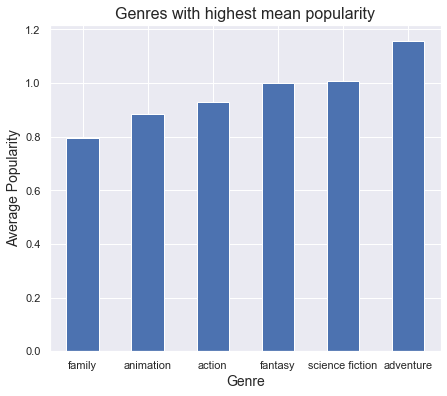

In [23]:
pop_mean.plot.bar(figsize=(7,6),rot=0)
plt.title('Genres with highest mean popularity', size=16)
plt.xlabel('Genre', size=14)
plt.ylabel('Average Popularity', size=14);

--------------

#### Q2 and what's year over year popularity for those 6 genres ?

In [24]:
# a function that will use the dataframe df_g which has exploded genre to produce a 
#  series of year as index and mean popularity as value for the given genre
def genre_mean_popularity(genre):
    """ (str) genre : string that represents the selected genre to find mean popularity for"""
    return df_g.query('genre_list == "{}"'.format(genre)).groupby('release_year')['popularity'].mean()

df_family2 = genre_mean_popularity("family")

In [25]:
#preparing to make a big plot that contains 6 mini plots for each genre of the above
# making datframe for yearly average popularity each genre of the above

#family:
df_family = genre_mean_popularity("family")

#animation:
df_animation = genre_mean_popularity("animation")

#action:
df_action = genre_mean_popularity("action")

#fantasy:
df_fantasy = genre_mean_popularity("fantasy")

#science_fiction:
df_sience_fiction = genre_mean_popularity("science fiction")

#adventure
df_adventure = genre_mean_popularity("adventure")

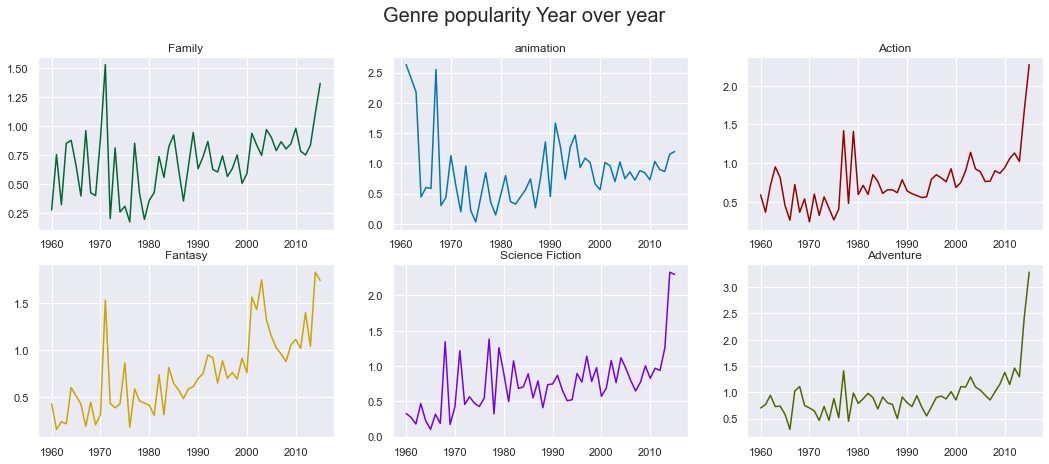

In [26]:
# making a big plot with multiple mini-plots 
sns.set_style("darkgrid")
figure, axis = plt.subplots(2, 3,figsize=(18,7))
#giving a main title 
plt.suptitle('Genre popularity Year over year',size=20)

#plotting each genre data in place
axis[0, 0].plot(df_family.index,df_family, color='#006633')
axis[0, 0].set_title("Family")

axis[0, 1].plot(df_animation.index,df_animation, color='#0077b3')
axis[0, 1].set_title("animation")

axis[0, 2].plot(df_action.index,df_action, color='#990000')
axis[0, 2].set_title("Action")

axis[1, 0].plot(df_fantasy.index,df_fantasy , color='#cca300')
axis[1, 0].set_title("Fantasy")

axis[1, 1].plot(df_sience_fiction.index,df_sience_fiction, color='#7300e6')
axis[1, 1].set_title("Science Fiction")

axis[1, 2].plot(df_adventure.index,df_adventure,  color='#4d6600')
axis[1, 2].set_title("Adventure")

plt.show()

___________________

#### Q3 what is the average revenue a movie makes in each genre?

**note** stats won't be 100% accurate as there is many 0 values in revenue column

In [27]:
# making a series that contains genre name as index and average mean for value 
df_genre_rev_mean = df_g.groupby('genre_list')['revenue'].mean().sort_values(ascending=False)
df_genre_rev_mean.idxmax()

'adventure'

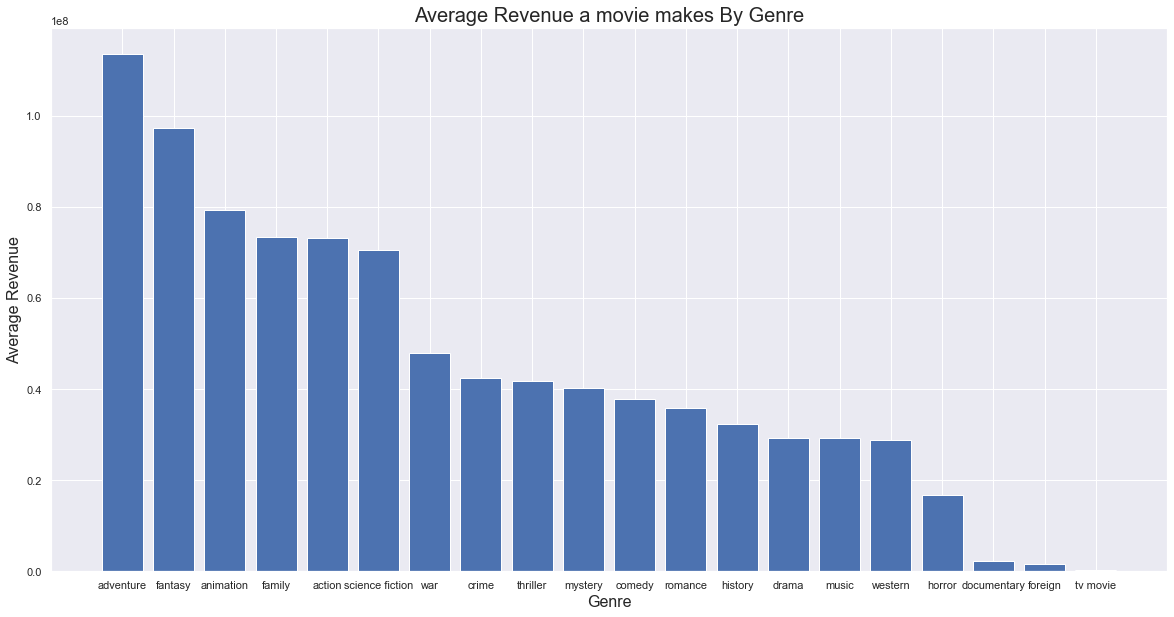

In [28]:
# making a bar plot that shows mean revenue a movie makes in each genre
plt.subplots(figsize=(20,10))
plt.bar(df_genre_rev_mean.index,df_genre_rev_mean)
plt.title('Average Revenue a movie makes By Genre',size=20)
plt.ylabel('Average Revenue',size =16)
plt.xlabel('Genre',size=16);

average revenue a movie makes in each genre.with adventure being the highest

____________________

#### Q4 what is the Total revenue achieved in each genre?

**note** stats won't be 100% accurate as there is many 0 values in revenue column

In [29]:
df_genre_rev_total = df_g.groupby('genre_list')['revenue'].sum().sort_values(ascending=False)
df_genre_rev_total.idxmax()

'action'

exploring total revenue for each genre visually:

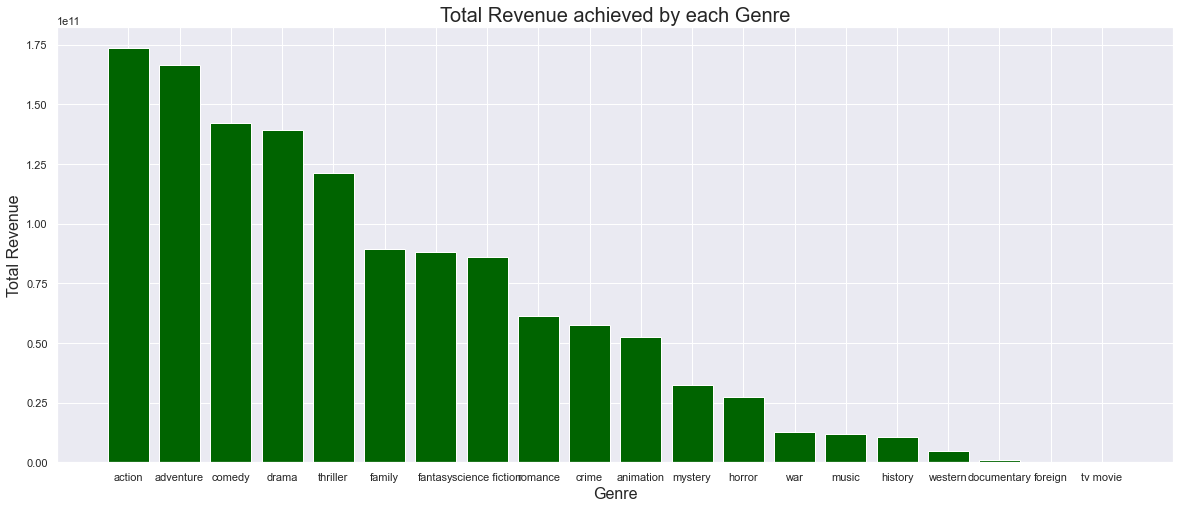

In [30]:
plt.subplots(figsize=(20,8))
plt.bar(df_genre_rev_total.index,df_genre_rev_total,color ='darkgreen')
plt.title('Total Revenue achieved by each Genre',size=20)
plt.ylabel('Total Revenue',size =16)
plt.xlabel('Genre',size=16);


Total revenue gained in each genre.with action having highst total revenue 

___

### Q5 What Properties are associated with revenue :

**note** : too many zero values in revenue & budget columns so stats won't be 100% accurate 
i will create a new data fram that has rows with 0 values in revenu and budget dropped, but this will cause limited sample size

In [31]:
# making a new dataframe with 0 values in revenue and budget dropped
df_revenue = df[df.revenue!= 0 ]
df_revenue = df_revenue[df_revenue.budget != 0]
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3849 non-null   float64       
 1   budget          3849 non-null   int64         
 2   revenue         3849 non-null   int64         
 3   original_title  3849 non-null   object        
 4   director        3849 non-null   object        
 5   runtime         3849 non-null   int64         
 6   release_date    3849 non-null   datetime64[ns]
 7   vote_count      3849 non-null   int64         
 8   vote_average    3849 non-null   float64       
 9   release_year    3849 non-null   int64         
 10  profit          3849 non-null   int64         
 11  genre_list      3849 non-null   object        
 12  cast_list       3849 non-null   object        
 13  company_list    3849 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
m

In [32]:
# dividing into 2 dataframes of high revenue and low revenu to compare properties
high_rev = df_revenue.query('revenue > revenue.median()')
low_rev =df_revenue.query('revenue < revenue.median()')
high_rev.shape,low_rev.shape

((1924, 14), (1924, 14))

####  what is the relation between budget and revenue

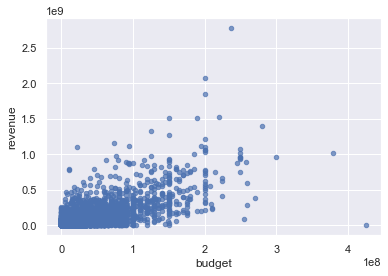

In [33]:
df.plot(kind="scatter", x='budget', y='revenue', color='b',alpha=.7);

Revenue is positively correlated with budget



 ______________________________________________________________________________________________________________________________

#### what's the relation between revenue and runtime?

In [34]:
#inspecting runtime stats for high than average revenue
high_rev.describe().runtime

count    1924.000000
mean      113.085759
std        20.589503
min        69.000000
25%        98.000000
50%       110.000000
75%       124.000000
max       248.000000
Name: runtime, dtype: float64

In [35]:
# runtime stats for low than average revenue stats
low_rev.describe().runtime

count    1924.000000
mean      105.347193
std        18.430007
min        15.000000
25%        94.000000
50%       102.000000
75%       113.000000
max       338.000000
Name: runtime, dtype: float64

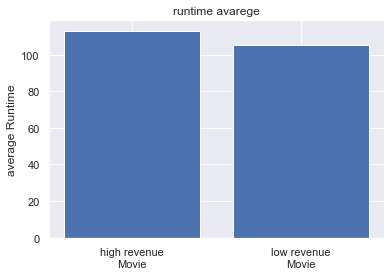

In [36]:
#comparing runtime means 
plt.bar(['high revenue\nMovie','low revenue\nMovie'], [high_rev.runtime.mean(),low_rev.runtime.mean()])
plt.title('runtime avarege')
plt.ylabel('average Runtime');

high revenue movies has more average run time

_______________________________________________________________________________________________________________________________  
  
  

####  what is the relation between revenue and popularity  ? 

comparing ditributions of popularity of high revenue movies and low revenue movies 

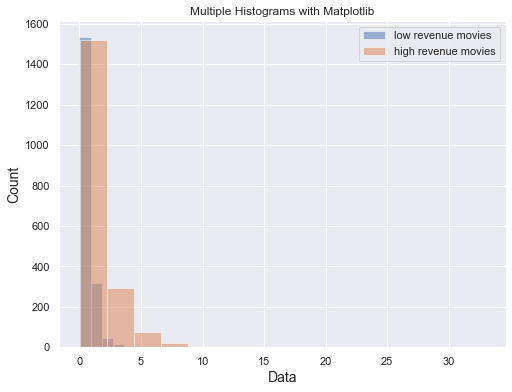

In [37]:
plt.figure(figsize=(8,6))
plt.hist(low_rev.popularity, bins=8, alpha=0.5, label="low revenue movies")
plt.hist(high_rev.popularity, bins=15, alpha=0.5, label="high revenue movies")



plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right');

high revenue movies are more ditributed in higher popularity areas
which means high revenue movies are usually more popular

comparing popularity between high revenue and low revenue Movies

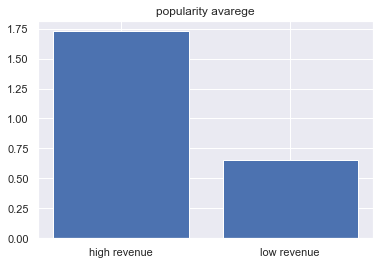

In [38]:
# comparing mean popularity of high revenue movies and low revenue movies 
plt.bar(['high revenue','low revenue'], [high_rev.popularity.mean(),low_rev.popularity.mean()])
plt.title('popularity avarege');

>high revenue movies are the more popular

________________________________________________________________________________________________________________________________

####  what is the relation between revenue and average ratings?

a scatter of ratings and revenue

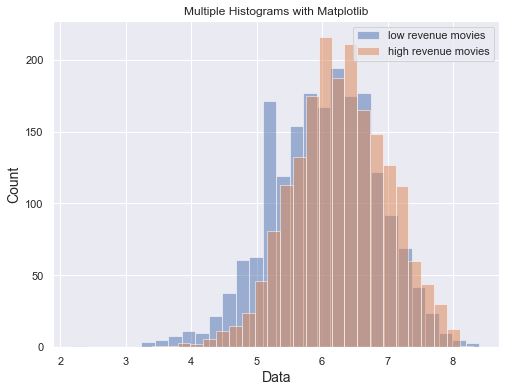

In [39]:
# comparing distributions of average ratings
plt.figure(figsize=(8,6))
plt.hist(low_rev.vote_average, bins=30, alpha=0.5, label="low revenue movies")
plt.hist(high_rev.vote_average, bins=25, alpha=0.5, label="high revenue movies")

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right');

high revenue movies are slightly mre ditributed to the right 

we can see the effect finding the mean below

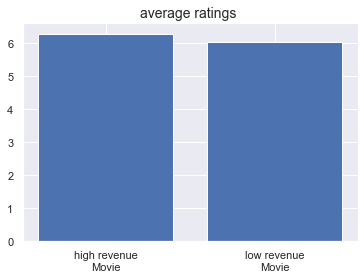

In [40]:
plt.bar(['high revenue\nMovie','low revenue\nMovie'], [high_rev.vote_average.mean(),low_rev.vote_average.mean()])
plt.title("average ratings ",size=14);

high revenue movies usually has slightly higher Ratings

__________________________________________

### Q6 (Research Question) Whats properities are associated with Top 10 revenue movies?

making a data frame for top 10 only 

then comparing it with df_revenue dataframe that has 0 values in revenue and budget dropped

In [41]:
#top 10 revenue
top_10 = df.sort_values(by=['revenue'],ascending=False).iloc[:10]
#inspecting stats for top_10
top_10.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,10.000000,1.000000e+01,1.000000e+01,10.0000,10.000000,10.000000,10.000000,1.000000e+01
mean,9.763478,1.952000e+08,1.645657e+09,139.9000,5412.100000,7.250000,2011.500000,1.450457e+09
std,8.451550,4.553826e+07,4.764679e+08,24.3468,2067.675638,0.343996,5.482295,4.619437e+08
min,4.355219,1.250000e+08,1.215440e+09,102.0000,2947.000000,6.500000,1997.000000,1.015440e+09
25%,5.769718,1.600000e+08,1.347122e+09,130.0000,3888.500000,7.150000,2011.250000,1.144481e+09
50%,6.875267,2.000000e+08,1.509889e+09,136.5000,4973.000000,7.300000,2013.000000,1.307904e+09
75%,9.408329,2.150000e+08,1.763665e+09,142.5000,6552.000000,7.475000,2015.000000,1.574658e+09
max,32.985763,2.800000e+08,2.781506e+09,194.0000,8903.000000,7.700000,2015.000000,2.544506e+09


In [42]:
# inspecting stats for othe movies
df_revenue.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03
mean,1.192933,3.724886e+07,1.078148e+08,109.217459,528.387114,6.168693,2001.258249,7.056595e+07
std,1.475622,4.221699e+07,1.766175e+08,19.914141,880.333629,0.794697,11.285642,1.506990e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,-4.139124e+08
25%,0.463337,1.000000e+07,1.367069e+07,95.000000,71.000000,5.700000,1995.000000,-1.312284e+06
50%,0.798582,2.400000e+07,4.490726e+07,106.000000,205.000000,6.200000,2004.000000,2.014450e+07
75%,1.374300,5.000000e+07,1.243052e+08,119.000000,581.000000,6.700000,2010.000000,8.198066e+07
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,2.544506e+09


#### comparing with total revenue of top 100

ratio of total revenue gained by top 10 to total revenue gained by top 100

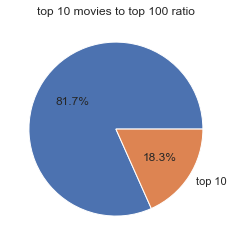

In [43]:
top100 = df.sort_values(by=['revenue'],ascending=False).iloc[10:100]

plt.pie([top100.revenue.sum(),top_10.revenue.sum()], labels=['','top 10'], autopct='%1.1f%%')
plt.title('top 10 movies to top 100 ratio');

revenue gained by the top 10 movies is 18.3% of the total revenue gained by the top 100 movies

#### comparing with average budget of other movies

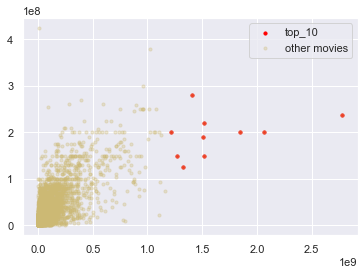

In [44]:
#scatter
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.scatter(top_10.revenue, top_10.budget, s = 10, c = 'red', label = 'top_10')
ax1.scatter(df_revenue.revenue,df_revenue.budget , s = 10, c = 'y',alpha =.3, label = 'other movies')
plt.legend(loc='upper right');
plt.show()

those top 10 revenue movies has more budget than most of other movies

as we can see comparing the means below

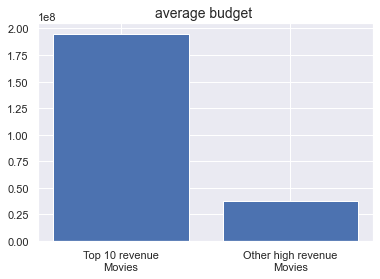

In [45]:
plt.bar(['Top 10 revenue\nMovies','Other high revenue\nMovies'], [top_10.budget.mean(),df_revenue.budget.mean()])
plt.title("average budget ",size=14);

more budget were spent on those movies

#### comparing with average runtime of other movies

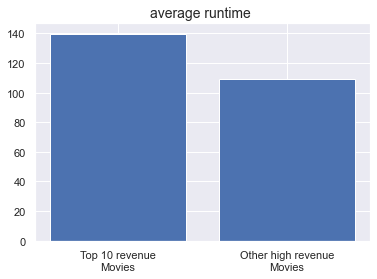

In [46]:
plt.bar(['Top 10 revenue\nMovies','Other high revenue\nMovies'], [top_10.runtime.mean(),df_revenue.runtime.mean()])
plt.title("average runtime ",size=14);

top 10 revenue movies has more runtime 

#### comparing with average ratings of other movies

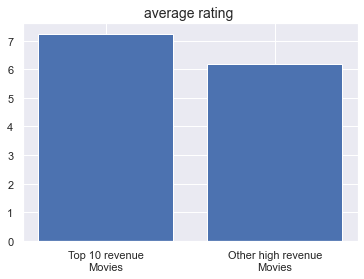

In [47]:
plt.bar(['Top 10 revenue\nMovies','Other high revenue\nMovies'], [top_10.vote_average.mean(),df_revenue.vote_average.mean()])
plt.title("average rating ",size=14);

they were more liked by the audience

#### comparing with average popularity of other movies

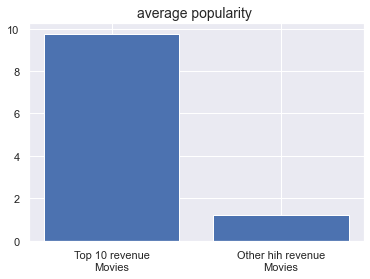

In [48]:
plt.bar(['Top 10 revenue\nMovies','Other hih revenue\nMovies'], [top_10.popularity.mean(),df_revenue.popularity.mean()])
plt.title("average popularity ",size=14);

they were more popular

_________________________________________________________________________________________________________________________________

### Highest percentages stats:

#### Director Stats!

#### Q9 Which Directors released more movies ?

In [49]:
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,profit,genre_list,cast_list,company_list
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,2015-06-09,5562,6.5,2015,1363528810,"[action, adventure, science fiction, thriller]","[chris pratt, bryce dallas howard, irrfan khan...","[Universal Studios, Amblin Entertainment, Lege..."


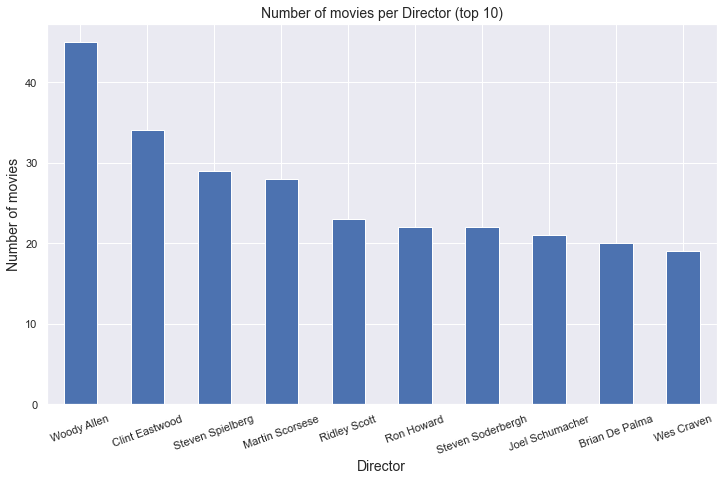

In [50]:
top_d = df.director.value_counts().sort_values(ascending=False)[:10]
top_d.plot.bar(rot=20,figsize=(12,7))

plt.title('Number of movies per Director (top 10)', size=14)
plt.xlabel('Director',size=14)
plt.ylabel('Number of movies', size=14);

#### actor stats!

In [57]:
#first we explode actor list
df_actor = df.explode('cast_list')
df_actor.shape

(52334, 14)

#### Q10 which actors has more movies (top 10)?

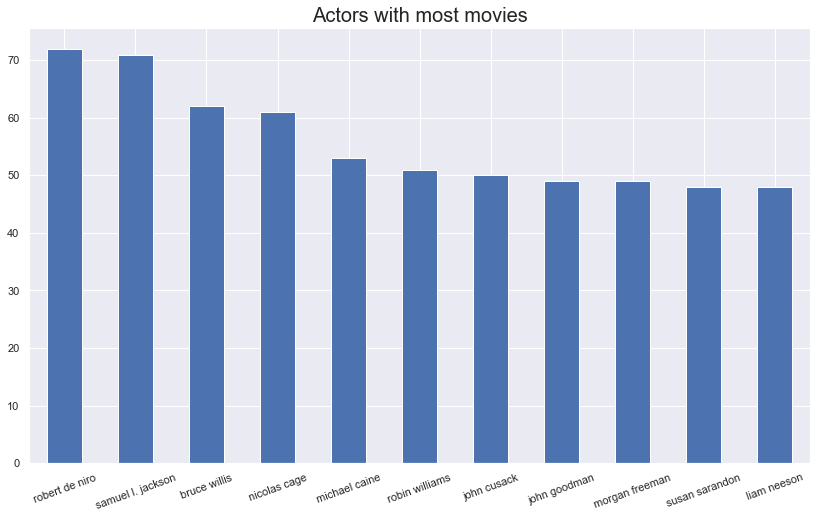

In [58]:
df_actor.cast_list.value_counts().sort_values(ascending=False)[:11].plot.bar(figsize=(14,8),rot=20)
plt.title('Actors with most movies',size=20);

Most seen actors with robert di niro having the most appearences

---------------------

#### Movie Stats!

#### Q11 which movie made highst profits?

In [59]:

high_profit_movie = df.query('profit == profit.max()')

print('movie That made Highst Profits: "{}", with {} profits.'.format(high_profit_movie.original_title.iloc[0],high_profit_movie.profit.iloc[0]))

movie That made Highst Profits: "Avatar", with 2544505847 profits.


#### Q12 Which Movies made highest Profits (top 10) ?

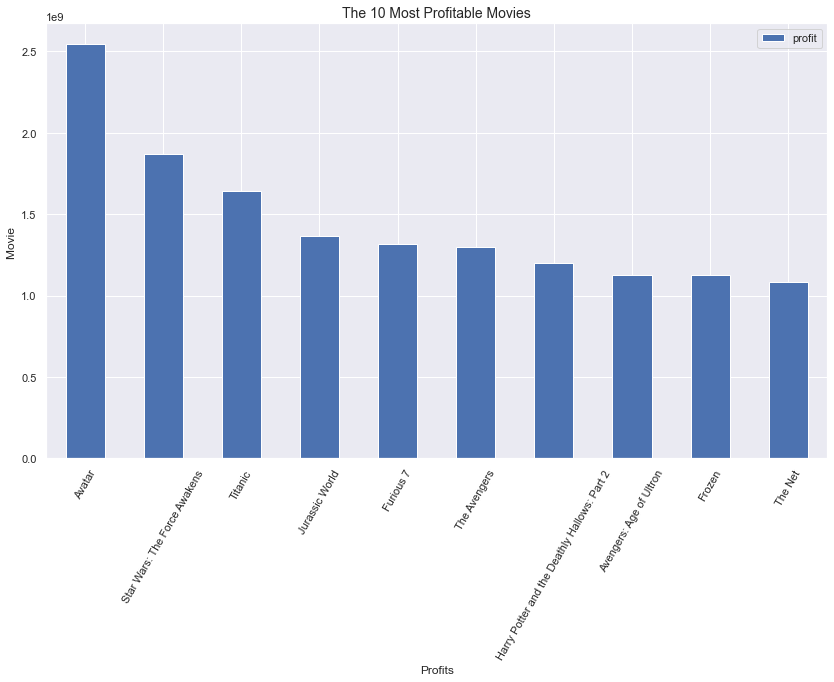

In [60]:
df_high_10 = df.sort_values(by=['profit'],ascending=False).iloc[:10]
df_high_10.plot.bar(x='original_title', y='profit',figsize=(14,8), rot=60)
plt.title('The 10 Most Profitable Movies',size=14)
plt.xlabel('Profits', size=12)
plt.ylabel('Movie ', size=12);

In [61]:
#profit of AVATAR movie
df_high_10.query('original_title == "Avatar"').profit

1386    2544505847
Name: profit, dtype: int64

In [62]:
#profit of star wars movie
df_high_10.query('original_title == "Star Wars: The Force Awakens"').profit

3    1868178225
Name: profit, dtype: int64

In [63]:
#profit of Titanic movie
df_high_10.query('original_title == "Titanic"').profit

5231    1645034188
Name: profit, dtype: int64

#### Production Comapny stats :

In [64]:
#preparing a data frame with exploded! company_list column to group by company later.

df_company = df.explode('company_list')
print("before ",df_company.shape)
# dropping rows with 'nan' strig from "company_list" column
df_company = df_company[df_company.company_list != 'nan']
print("after ",df_company.shape)

before  (24221, 14)
after  (23262, 14)


#### Q13 Wich Production Companies released more movies?

Text(0.5, 0, 'Number of Movies')

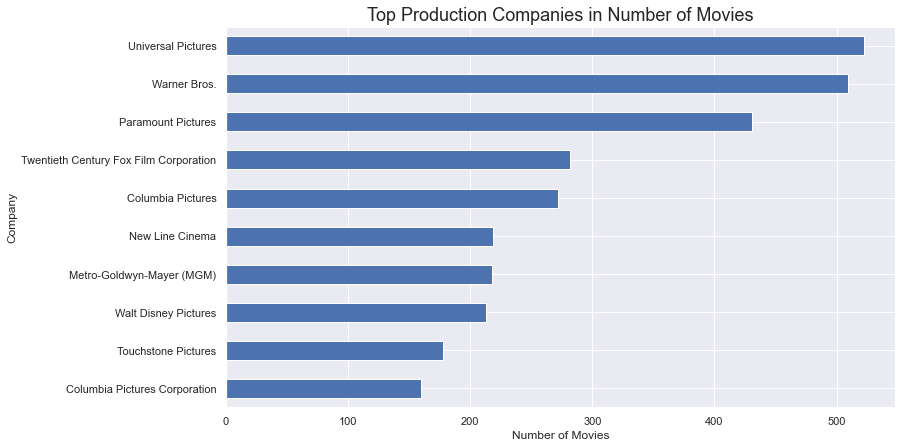

In [65]:
# getting the top 10 production companies in number of released movies 
companies = df_company.company_list.value_counts().sort_values()[-10:]
companies.plot.barh(figsize=(12,7))

plt.title('Top Production Companies in Number of Movies',size=18)
plt.ylabel('Company',size=12)
plt.xlabel('Number of Movies',size=12)

In [66]:
# just to make sure that stats are right and the counts are for unique movies
df_company.query('company_list == "Universal Pictures"')['original_title'].nunique()

520

In [67]:
# just to make sure that stats are right and the counts are for unique movies
df_company.query('company_list == "Warner Bros."')['original_title'].nunique()

508

#### Q14 Which companies achieved highest revenues?

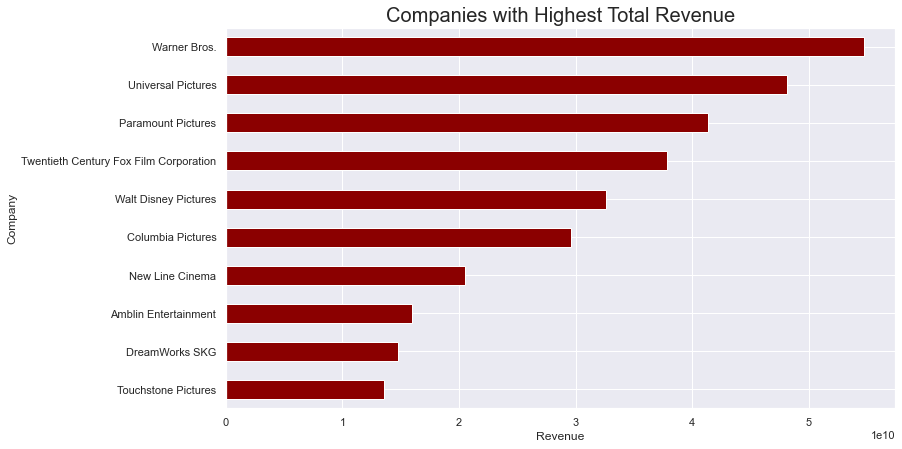

In [68]:
df_company.groupby('company_list')['revenue'].sum().sort_values()[-10:].plot.barh(figsize=(12,7),color='darkred')
plt.title('Companies with Highest Total Revenue', size=20)
plt.xlabel('Revenue', size=12)
plt.ylabel('Company',size=12);

In [69]:
df_company.groupby('company_list')['revenue'].sum().sort_values(ascending=False)[:10]

company_list
Warner Bros.                              54688433698
Universal Pictures                        48134982923
Paramount Pictures                        41348789455
Twentieth Century Fox Film Corporation    37828180788
Walt Disney Pictures                      32611388637
Columbia Pictures                         29605277429
New Line Cinema                           20482023427
Amblin Entertainment                      15954216032
DreamWorks SKG                            14787064846
Touchstone Pictures                       13558288374
Name: revenue, dtype: int64

top 10 companies in gained revenue compared to total revenue

In [70]:
top =  df_company.groupby('company_list')['revenue'].sum().sort_values(ascending=False)[:10].sum()
total = df_company.revenue.sum()

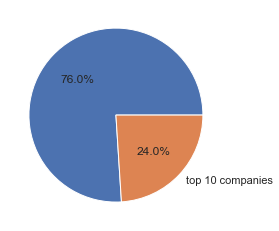

In [71]:
plt.pie([total-top,top],labels=['','top 10 companies'],autopct='%1.1f%%');

about 24% of total revenue gained by all companies were gained by 10 companies

---------------------

## Report!
**note** data limitation : revenue and budget columns have too many non given values. which will limit the analysis and cause non-accurate results. 
###  Genres' Statistics :
#### 1 which genres had highest overall average popularity?
- genres that had highest mean popularity are (from first to 6th): adventure, science fiction, fantasy, action, animation, family. 

#### 2 and  what's year over year popularity for those 6 genres?
- popularity for there genres varied over the years, as an example adventure wasn't so popular from the 60th to the 70th and got more popular around 1980 then started to get even more popular after 2010 .

#### 3 what is the average revenue a movie makes in each genre?
- adventure genre has the highest average revenue of movies  .

#### 4 what is the Total revenue achieved in each genre?
- action, adventure and comedy achieved the highest total revenue.

###  5 what properties are associated with revenue ? :
**note** too many rows in revenue and budget columns were not given so stats associated with those 2 won't be 100% accurate because of the limite sample.
####  in terms of budget.
- revenue has positive corelation with budget. which means movies with more budget spent on are more likely to gain more revenue.

####  in terms of Runtime.
- high revenue movies have more mean runtime than lower revenue ones.

####  in terms of popularity.
- high revenue movies are usually more popular.
- mean popularity for high revenue movies is significantly more than low revenue monies.

####  in terms of average ratings.
- the vote_average for high revenue movies are slightly more ditributed to the right.
- high revenue movies has slighly higher average rating than low revenue movies.

###  6 properties associated with Top 10 revenue movies:(compared to other high revenue movies.
- 18.3% of the total revenue gained by the top 100 movies were gained by the top 10 movies.
- those top 10 movies has even more budget spent on them.
- average runtime of these movies is more than average runtime of other high revenue movie .
- they have an average of 7 rating more than other high revenue movies which have a mean of 6.1
- the popularity of these top 10 movies is clearly more than any other movie .

###  Highest percentages stats :
#### 7 Directors: which directors realesed most movies(top10) ?
- "woody allen" directed highest number of movies ,and more than any other director .

#### 8 Actors: Which Actors has more movies (top 10)?
- "Robert di niro" comes in the first place as the most frequent actor, then "Samuel l.jackson" comes in the second place, then "Bruce willis" at the 3rd place .

#### 9 Movies: which movie made highest revenue ?
- "Avatar" is the Movie that achieved the highest revenue of all time.

#### 10 which movies made highest profits (top10)?
- also "Avatar" is the Movie that achieved the highest profits of all time with a profit of more than 2.5 billion dollars .
- and in the second movie to acheve more profits is "Star Wars: The Force Awakens" with 1.8 billion dollars.
- And "Titanic" is the third one with 1.6 billion dollars.

#### 11 Production Company: which production company has higher movie realeses?
- "Universal Pictures" released more movies than any other prodution company with 520 Movie released.
- And in second place os "warner bruce" company which released 508 movies.

#### 12 which companies has highest total revenue?
- about 24% of total revenue gained by all companies were gained by 10 companies.
- "warner Bruce" Company achived the highest Total revenue of all time with total of 54.6 billion dollars.
- "Universal Pictures" is the 2nd with total of 48 billion dollars.
- "paramount Pictures" is the 3rd with total of 41.3 billion dollars.
- "20th Fox film corporation" is the 4th with total of 37.8 billion dollars.
- "walt disney Pictures" is the 5th with total of 32 billion dollars.

In [66]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1